#### Используя данные World Development Indicators (http://data.worldbank.org/indicator), рассчитайте среднегодовой темп роста реального ВВП за 1980-2022 гг. (или за максимально доступный период времени внутри этого интервала) для следующих стран: Россия, Германия, Франция, Великобритания, Япония, США, Китай, Индия.

#### Импорт библиотек и файла

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gmean

In [16]:
gdp = pd.read_csv('GDP growth (annual %).csv')

#### Выбираю нужные страны

In [17]:
countries = ['Russian Federation', 'Germany', 'France', 'United Kingdom', 'Japan', 'United States', 'China', 'India']
gdp_needed = gdp[gdp['Country Name'].isin(countries)]
gdp_needed

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
40,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,-27.270000,-5.580000,10.300000,18.180000,16.950000,...,7.766150,7.425764,7.041329,6.848762,6.947201,6.749774,5.950501,2.239702,8.109793,NaN
55,Germany,DEU,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437591,2.209543,1.491932,2.230000,2.680231,0.981233,1.056604,-3.696789,2.626987,NaN
77,France,FRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,4.980112,6.843470,6.233680,6.652100,4.861508,...,0.576327,0.956183,1.112912,1.095464,2.291420,1.865066,1.842972,-7.784586,6.816589,NaN
81,United Kingdom,GBR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,...,1.819863,3.199703,2.393103,2.165206,2.443570,1.705021,1.604309,-11.030858,7.524910,NaN
109,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.722743,2.931128,5.994353,7.452950,-2.635770,...,6.386106,7.410228,7.996254,8.256306,6.795383,6.453851,3.737919,-6.596081,8.681229,NaN
119,Japan,JPN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,...,2.005100,0.296206,1.560627,0.753827,1.675332,0.584068,-0.240351,-4.506905,1.657071,NaN
202,Russian Federation,RUS,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.755422,0.736267,-1.972719,0.193690,1.825790,2.807245,2.198076,-2.663758,4.749584,NaN
251,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,...,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485,NaN


#### Удаляю ненужные колонки

In [18]:
gdp_needed = gdp_needed.drop(columns=['Indicator Code', 'Indicator Name', 'Country Code', 'Unnamed: 66'])
gdp_needed

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
40,China,NaN,-27.270000,-5.580000,10.300000,18.180000,16.950000,10.650000,-5.770000,-4.100000,...,7.863736,7.766150,7.425764,7.041329,6.848762,6.947201,6.749774,5.950501,2.239702,8.109793
55,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.418498,0.437591,2.209543,1.491932,2.230000,2.680231,0.981233,1.056604,-3.696789,2.626987
77,France,NaN,4.980112,6.843470,6.233680,6.652100,4.861508,5.251837,4.921149,4.491309,...,0.313135,0.576327,0.956183,1.112912,1.095464,2.291420,1.865066,1.842972,-7.784586,6.816589
81,United Kingdom,NaN,2.677119,1.102910,4.874384,5.533659,2.142177,1.573100,2.786475,5.441083,...,1.448457,1.819863,3.199703,2.393103,2.165206,2.443570,1.705021,1.604309,-11.030858,7.524910
109,India,NaN,3.722743,2.931128,5.994353,7.452950,-2.635770,-0.055329,7.825963,3.387929,...,5.456389,6.386106,7.410228,7.996254,8.256306,6.795383,6.453851,3.737919,-6.596081,8.681229
119,Japan,NaN,12.043536,8.908973,8.473642,11.676708,5.819708,10.638562,11.082142,12.882468,...,1.374751,2.005100,0.296206,1.560627,0.753827,1.675332,0.584068,-0.240351,-4.506905,1.657071
202,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.024086,1.755422,0.736267,-1.972719,0.193690,1.825790,2.807245,2.198076,-2.663758,4.749584
251,United States,NaN,2.300000,6.100000,4.400000,5.800000,6.400000,6.500000,2.500000,4.800000,...,2.280688,1.841875,2.287776,2.706370,1.667472,2.241921,2.945385,2.294439,-2.767803,5.945485


##### Смотрю какого формата значения в колонках перед их обработкой

In [19]:
gdp_needed.dtypes

Country Name     object
1960            float64
1961            float64
1962            float64
1963            float64
                 ...   
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
Length: 63, dtype: object

### Решил нарисовать график GDP trend for selected countries (Жесть Китай в 1961 жалко)

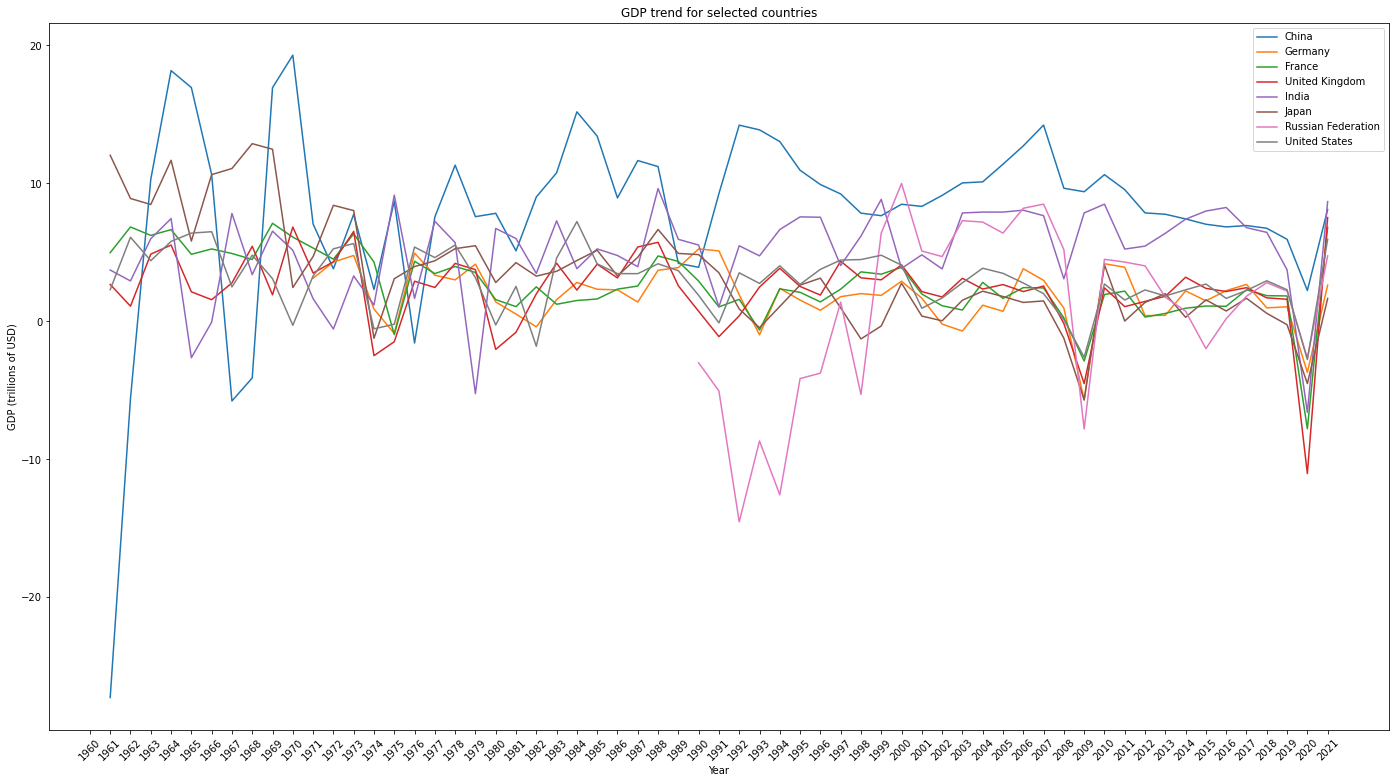

In [20]:
plt.figure(figsize=(24, 13))
for country in gdp_needed['Country Name'].unique():
        data = gdp_needed[gdp_needed['Country Name'] == country]
        plt.plot(data.columns[1:], data.values[0][1:], label=country)
plt.xlabel('Year')
plt.ylabel('GDP (trillions of USD)')
plt.title('GDP trend for selected countries')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [21]:
gdp_needed.iloc[:, 1:] = gdp_needed.iloc[:, 1:] + 100
gdp_needed

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
40,China,NaN,72.730000,94.420000,110.300000,118.180000,116.950000,110.650000,94.230000,95.900000,...,107.863736,107.766150,107.425764,107.041329,106.848762,106.947201,106.749774,105.950501,102.239702,108.109793
55,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.418498,100.437591,102.209543,101.491932,102.230000,102.680231,100.981233,101.056604,96.303211,102.626987
77,France,NaN,104.980112,106.843470,106.233680,106.652100,104.861508,105.251837,104.921149,104.491309,...,100.313135,100.576327,100.956183,101.112912,101.095464,102.291420,101.865066,101.842972,92.215414,106.816589
81,United Kingdom,NaN,102.677119,101.102910,104.874384,105.533659,102.142177,101.573100,102.786475,105.441083,...,101.448457,101.819863,103.199703,102.393103,102.165206,102.443570,101.705021,101.604309,88.969142,107.524910
109,India,NaN,103.722743,102.931128,105.994353,107.452950,97.364230,99.944671,107.825963,103.387929,...,105.456389,106.386106,107.410228,107.996254,108.256306,106.795383,106.453851,103.737919,93.403919,108.681229
119,Japan,NaN,112.043536,108.908973,108.473642,111.676708,105.819708,110.638562,111.082142,112.882468,...,101.374751,102.005100,100.296206,101.560627,100.753827,101.675332,100.584068,99.759649,95.493095,101.657071
202,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104.024086,101.755422,100.736267,98.027281,100.193690,101.825790,102.807245,102.198076,97.336242,104.749584
251,United States,NaN,102.300000,106.100000,104.400000,105.800000,106.400000,106.500000,102.500000,104.800000,...,102.280688,101.841875,102.287776,102.706370,101.667472,102.241921,102.945385,102.294439,97.232197,105.945485


#### Выбираю только данные с 1990 года, так как с этого года у всех стран отсутствуют пропущенные значения, ищу среднее арифметическое и среднее геометрическое

In [22]:
gdp_needed['arif_average_gdp_growth'] = gdp_needed.loc[:, "1990":"2021"].mean(axis=1)


gdp_needed['geom_average_gdp_growth'] = gmean(gdp_needed.loc[:, "1990":"2021"], axis=1)


In [23]:
gdp_needed

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,arif_average_gdp_growth,geom_average_gdp_growth
40,China,NaN,72.730000,94.420000,110.300000,118.180000,116.950000,110.650000,94.230000,95.900000,...,107.425764,107.041329,106.848762,106.947201,106.749774,105.950501,102.239702,108.109793,109.080792,109.047319
55,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.209543,101.491932,102.230000,102.680231,100.981233,101.056604,96.303211,102.626987,101.498351,101.474563
77,France,NaN,104.980112,106.843470,106.233680,106.652100,104.861508,105.251837,104.921149,104.491309,...,100.956183,101.112912,101.095464,102.291420,101.865066,101.842972,92.215414,106.816589,101.500297,101.473889
81,United Kingdom,NaN,102.677119,101.102910,104.874384,105.533659,102.142177,101.573100,102.786475,105.441083,...,103.199703,102.393103,102.165206,102.443570,101.705021,101.604309,88.969142,107.524910,101.697881,101.652509
109,India,NaN,103.722743,102.931128,105.994353,107.452950,97.364230,99.944671,107.825963,103.387929,...,107.410228,107.996254,108.256306,106.795383,106.453851,103.737919,93.403919,108.681229,105.901521,105.859048
119,Japan,NaN,112.043536,108.908973,108.473642,111.676708,105.819708,110.638562,111.082142,112.882468,...,100.296206,101.560627,100.753827,101.675332,100.584068,99.759649,95.493095,101.657071,100.905281,100.883316
202,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.736267,98.027281,100.193690,101.825790,102.807245,102.198076,97.336242,104.749584,100.876209,100.685905
251,United States,NaN,102.300000,106.100000,104.400000,105.800000,106.400000,106.500000,102.500000,104.800000,...,102.287776,102.706370,101.667472,102.241921,102.945385,102.294439,97.232197,105.945485,102.410561,102.393940


#### Оставляю только колонки с ответом

In [24]:
gdp_needed_without_years = gdp_needed.drop(columns = gdp_needed.columns[1:-2])
gdp_needed_without_years

,Country Name,arif_average_gdp_growth,geom_average_gdp_growth
40,China,109.080792,109.047319
55,Germany,101.498351,101.474563
77,France,101.500297,101.473889
81,United Kingdom,101.697881,101.652509
109,India,105.901521,105.859048
119,Japan,100.905281,100.883316
202,Russian Federation,100.876209,100.685905
251,United States,102.410561,102.393940


#### Округляю ответ до сотых

In [25]:
gdp_needed_without_years

,Country Name,arif_average_gdp_growth,geom_average_gdp_growth
40,China,109.080792,109.047319
55,Germany,101.498351,101.474563
77,France,101.500297,101.473889
81,United Kingdom,101.697881,101.652509
109,India,105.901521,105.859048
119,Japan,100.905281,100.883316
202,Russian Federation,100.876209,100.685905
251,United States,102.410561,102.393940


In [26]:
gdp_needed_without_years_round = gdp_needed_without_years.copy()
gdp_needed_without_years_round.loc[:, ['arif_average_gdp_growth', 'geom_average_gdp_growth']] = gdp_needed_without_years.loc[:,['arif_average_gdp_growth', 'geom_average_gdp_growth']].round(2)

In [27]:
gdp_needed_without_years_round

,Country Name,arif_average_gdp_growth,geom_average_gdp_growth
40,China,109.08,109.05
55,Germany,101.50,101.47
77,France,101.50,101.47
81,United Kingdom,101.70,101.65
109,India,105.90,105.86
119,Japan,100.91,100.88
202,Russian Federation,100.88,100.69
251,United States,102.41,102.39


# Maxim Lyara 18.03.2023